
# Machine Learning: Life Expectancy Prediction

In this section, supervised machine learning models are applied to predict **Life Expectancy** using economic, environmental, and social indicators.

The analysis is conducted on the **clean 2019 cross-sectional dataset**, ensuring consistency with the hypothesis testing framework used earlier in the project.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
df = pd.read_csv("master_cross_section.csv")
if "iso_code" in df.columns:
    df = df.rename(columns={"iso_code": "ISO3"})

# only 2019 cross-section
df_2019 = df[df["Year"] == 2019].copy()

# Features and target
features = ["GDP", "CO2_total", "HDI", "GII"]
target = "LifeExpectancy"

df_ml = df_2019[features + [target]].dropna()
X = df_ml[features]
y = df_ml[target]
print("Number of countries used:", len(df_ml))

Number of countries used: 167


## Train–Test Split

The dataset is divided into training and testing subsets using an **80%–20% split**.
This allows model performance to be evaluated on unseen data and reduces overfitting risk.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression (Baseline Model)

Linear Regression is used as a **baseline model** to capture linear relationships between the predictors and life expectancy.



--- Linear Regression Results ---
MSE: 7.387
R²: 0.892


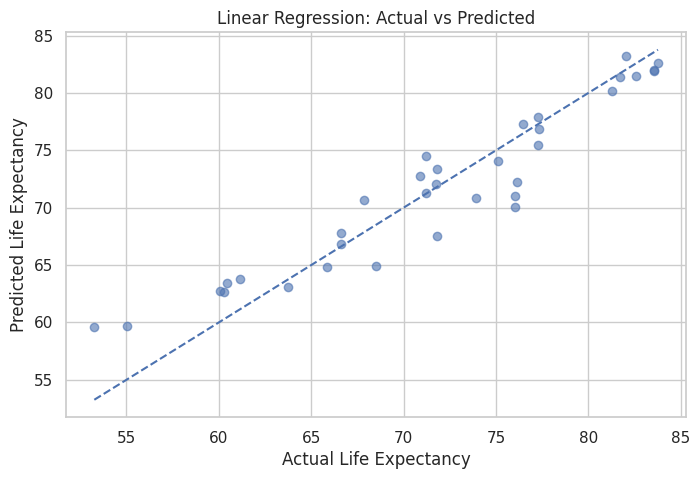

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\n--- Linear Regression Results ---")
print("MSE:", round(mse_lr, 3))
print("R²:", round(r2_lr, 3))

plt.figure()
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

## Random Forest Regressor

Random Forest is a non-linear ensemble model capable of capturing complex interactions among variables.
It is expected to outperform Linear Regression if non-linear relationships are present.


In [16]:
rf = RandomForestRegressor( n_estimators=300,random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\n--- Random Forest Results ---")
print("MSE:", round(mse_rf, 3))
print("R²:", round(r2_rf, 3))


--- Random Forest Results ---
MSE: 8.515
R²: 0.876


## Actual vs Predicted Life Expectancy (Random Forest)

This scatter plot compares actual life expectancy values with predictions generated by the Random Forest model.
The dashed diagonal line represents perfect prediction.


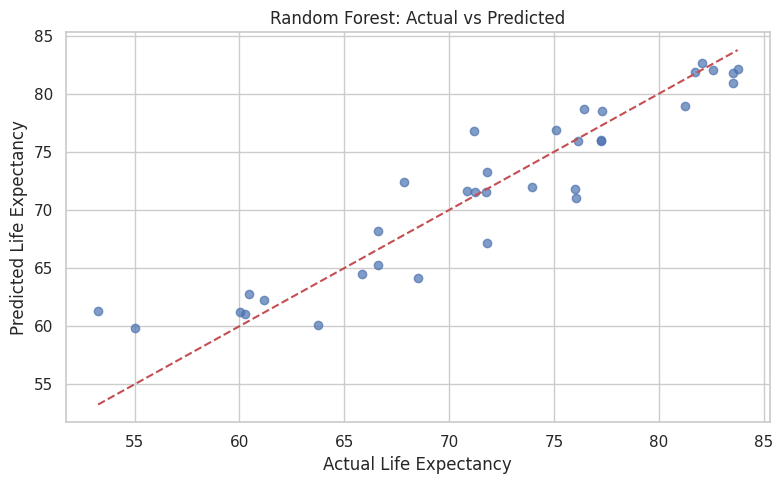

In [17]:
plt.figure()
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Random Forest: Actual vs Predicted")
plt.tight_layout()
plt.show()


## Feature Importance (Random Forest)

Feature importance scores indicate how much each predictor contributes to the Random Forest model.
Higher values correspond to greater influence on life expectancy predictions.


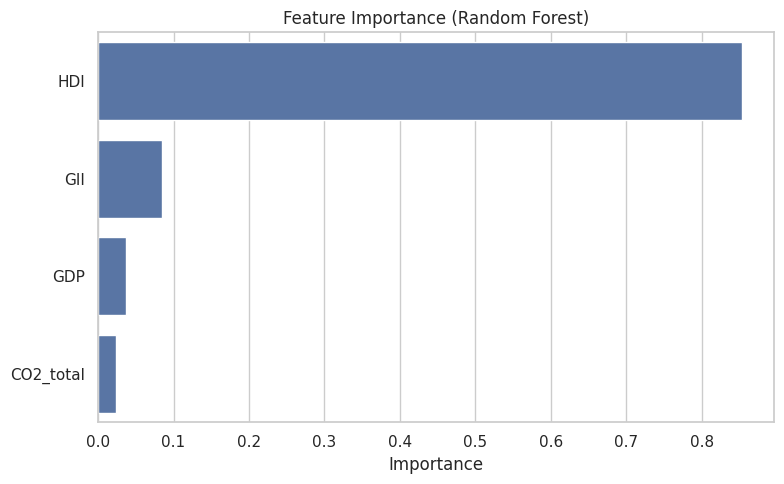

In [18]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure()
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("")
plt.tight_layout()
plt.show()

## Conclusion

Linear Regression was employed as a baseline model to capture the average linear relationship between life expectancy and key economic, environmental, and social indicators, offering a clear and interpretable benchmark. Random Forest was used as a complementary model to account for potential non-linear interactions and complex relationships among the variables. While Linear Regression demonstrated strong overall explanatory power, Random Forest provided additional insights through feature importance analysis and confirmed the dominant role of HDI in explaining life expectancy. Both models consistently indicate that GDP and gender inequality play secondary roles, whereas CO₂ emissions have a relatively limited direct effect, reinforcing the robustness of the results.
